In [78]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [79]:
from typing import Tuple

train_miou = re.compile("train_mIoU (\d+.\d+)")
valid_miou = re.compile("valid_mIoU (\d+.\d+)")

def parse(fpath) -> Tuple[np.ndarray, np.ndarray]:
    t_epoch, v_epoch = 0, 0
    train = np.array([])
    val = np.array([])
    with open(fpath) as f:
        for line in f:
            if re.search(train_miou, line):
                t = re.findall(train_miou, line)[0]
                # print('t: ', t)
                train = np.append(train, t)
            elif re.search(valid_miou, line):
                v = re.findall(valid_miou, line)[0]
                # print('v: ', v)
                val = np.append(val, v)

    return train, val

In [80]:
t1, v1 = parse('./teacher_trained_100.txt')

In [81]:
t1

array(['0.179', '0.243', '0.288', '0.319', '0.345', '0.366', '0.388',
       '0.395', '0.412', '0.407', '0.434', '0.450', '0.445', '0.460',
       '0.469', '0.484', '0.483', '0.498', '0.499', '0.504', '0.504',
       '0.495', '0.516', '0.509', '0.519', '0.526', '0.515', '0.527',
       '0.527', '0.542', '0.538', '0.545', '0.548', '0.547', '0.546',
       '0.556', '0.560', '0.552', '0.560', '0.556', '0.553', '0.572',
       '0.562', '0.571', '0.580', '0.569', '0.559', '0.571', '0.584',
       '0.572', '0.583', '0.586', '0.587', '0.594', '0.576', '0.600',
       '0.584', '0.590', '0.598', '0.597', '0.604', '0.601', '0.599',
       '0.607', '0.587', '0.586', '0.612', '0.603', '0.607', '0.616',
       '0.611', '0.615', '0.623', '0.594', '0.608', '0.607', '0.610',
       '0.621', '0.617', '0.611', '0.620', '0.626', '0.639', '0.629',
       '0.629', '0.624', '0.635', '0.643', '0.629', '0.625', '0.638',
       '0.617', '0.633', '0.632', '0.641', '0.637', '0.642', '0.629',
       '0.650', '0.6

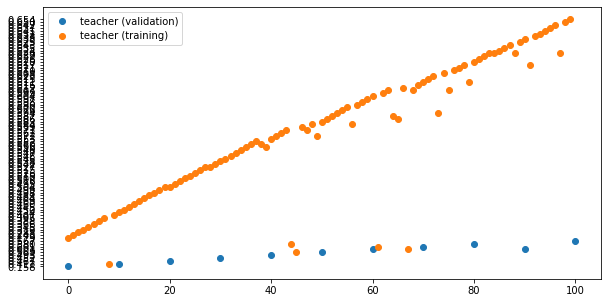

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))

v_epochs = list(range(0,101,10))
t_epochs = list(range(0,100))
# print(v_epochs)

ax.scatter(v_epochs, v1, label='teacher (validation)')
ax.scatter(t_epochs, t1, label='teacher (training)')
# ax.set_ylim((0,1))
ax.legend()